In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_theme()

In [26]:
hydro = pd.read_csv("data/RRCA_baseflow.csv")

In [4]:
hydro.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


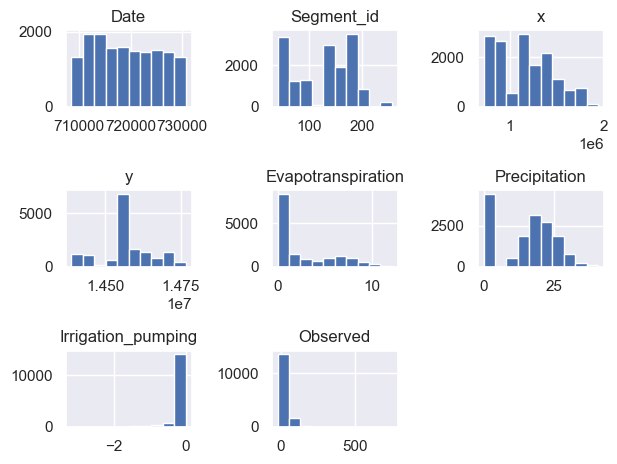

In [5]:
hydro.hist()
plt.tight_layout()

<AxesSubplot: xlabel='Precipitation', ylabel='Observed'>

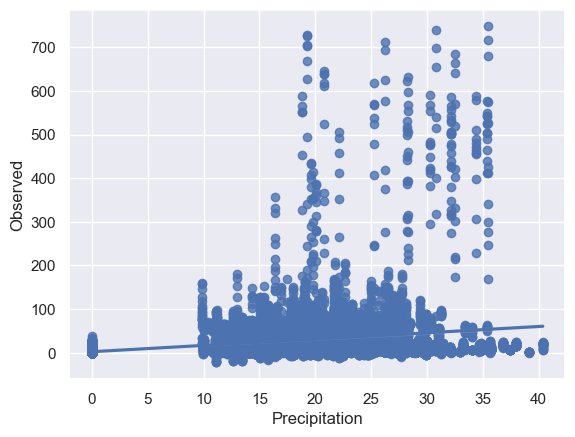

In [6]:
sns.regplot(hydro, x="Precipitation", y="Observed")

In [7]:
pd.get_dummies(hydro, columns=["Segment_id"], drop_first=True)

,Date,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Segment_id_51,Segment_id_53,Segment_id_55,...,Segment_id_176,Segment_id_178,Segment_id_186,Segment_id_188,Segment_id_189,Segment_id_194,Segment_id_196,Segment_id_205,Segment_id_239,Segment_id_256
0,710732,1086190,14476800,0.59,18.99,0.0,0.145161,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,710763,1086190,14476800,0.97,29.63,0.0,0.445161,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,710791,1086190,14476800,1.34,29.63,0.0,1.332203,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,710822,1086190,14476800,1.79,29.63,0.0,2.932203,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,710852,1086190,14476800,8.23,29.63,0.0,3.728689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15586,721810,721870,14387040,0.00,0.00,0.0,0.298500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15587,721841,721870,14387040,0.00,0.00,0.0,0.211475,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15588,721871,721870,14387040,0.00,0.00,0.0,0.122951,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15589,721902,721870,14387040,0.00,0.00,0.0,0.120000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# look at descriptive stats
hydro.describe()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
count,15591.000000,15591.000000,1.559100e+04,1.559100e+04,15591.000000,15591.000000,15591.000000,15591.000000
mean,719206.175358,126.589892,1.169435e+06,1.457066e+07,2.687491,14.915469,-0.090713,23.986754
std,6287.339388,52.789605,2.924991e+05,8.331048e+04,3.167235,10.512909,0.273726,56.275292
min,708479.000000,40.000000,7.218700e+05,1.438704e+07,0.000000,0.000000,-3.164700,-22.000000
25%,713623.000000,64.000000,9.066700e+05,1.454544e+07,0.000000,0.000000,-0.012000,1.985455
50%,718858.000000,145.000000,1.170670e+06,1.456128e+07,1.040000,17.490000,0.000000,7.703934
75%,724642.000000,171.000000,1.392430e+06,1.461936e+07,5.340000,22.370000,0.000000,22.804139
max,730729.000000,256.000000,1.941550e+06,1.476720e+07,12.100000,40.380000,0.000000,747.803280


Text(0.5, 1.0, 'Boxplot of Observed BaseFlow')

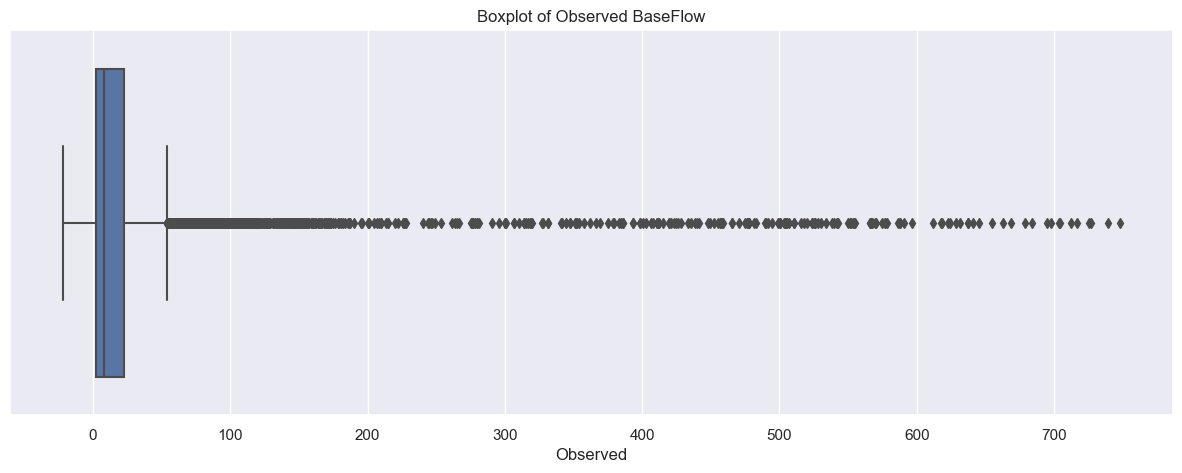

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(x=hydro.Observed)
plt.title("Boxplot of Observed BaseFlow")

<AxesSubplot: xlabel='Observed'>

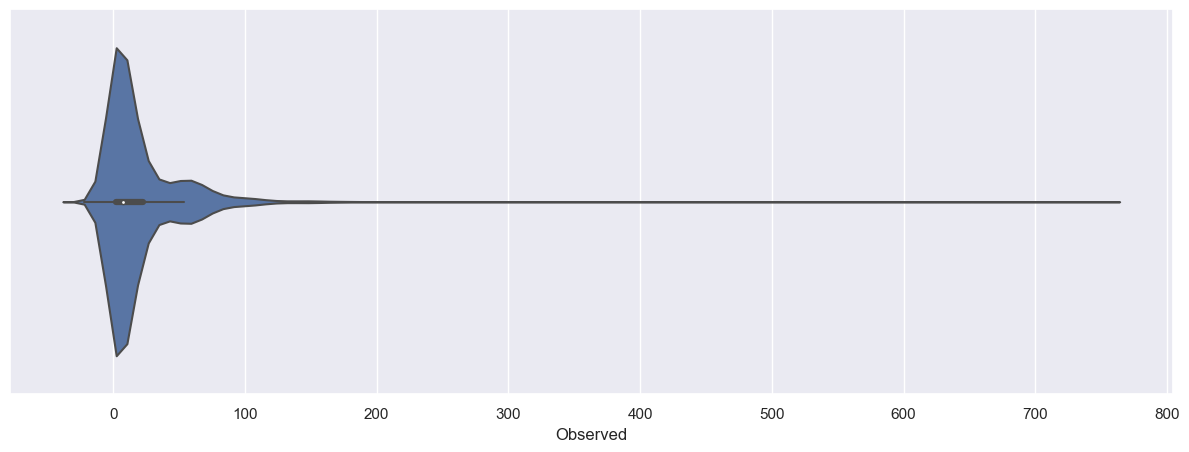

In [10]:
plt.figure(figsize=(15,5))
sns.violinplot(x=hydro.Observed)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='Observed'>

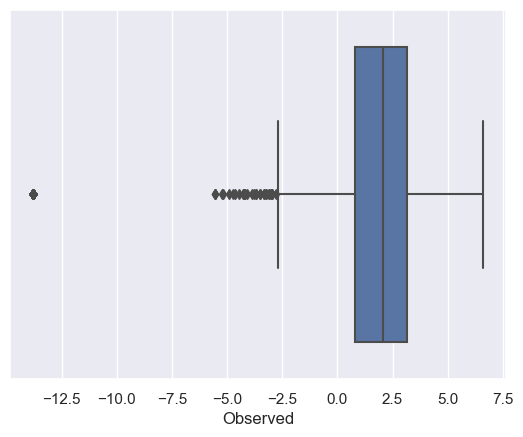

In [11]:
# what about if log transformed?
sns.boxplot(x=np.log(hydro.Observed + 0.000001))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='Observed'>

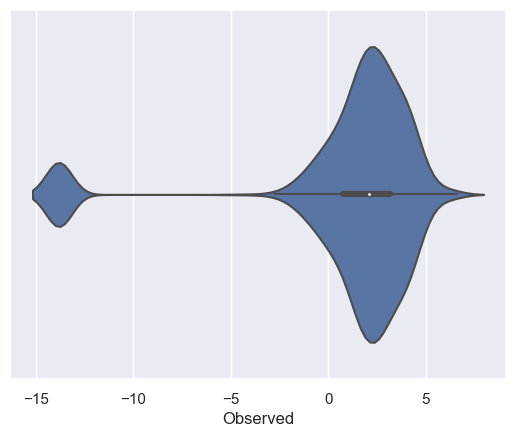

In [12]:
sns.violinplot(x=np.log(hydro.Observed + 0.000001))

(0.0, 800.0)

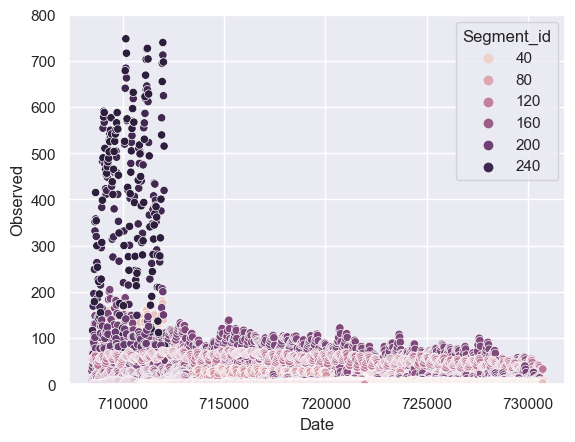

In [15]:
sns.scatterplot(hydro, x="Date", y="Observed", alpha=1, color="black", hue="Segment_id")
plt.ylim(0, 800)

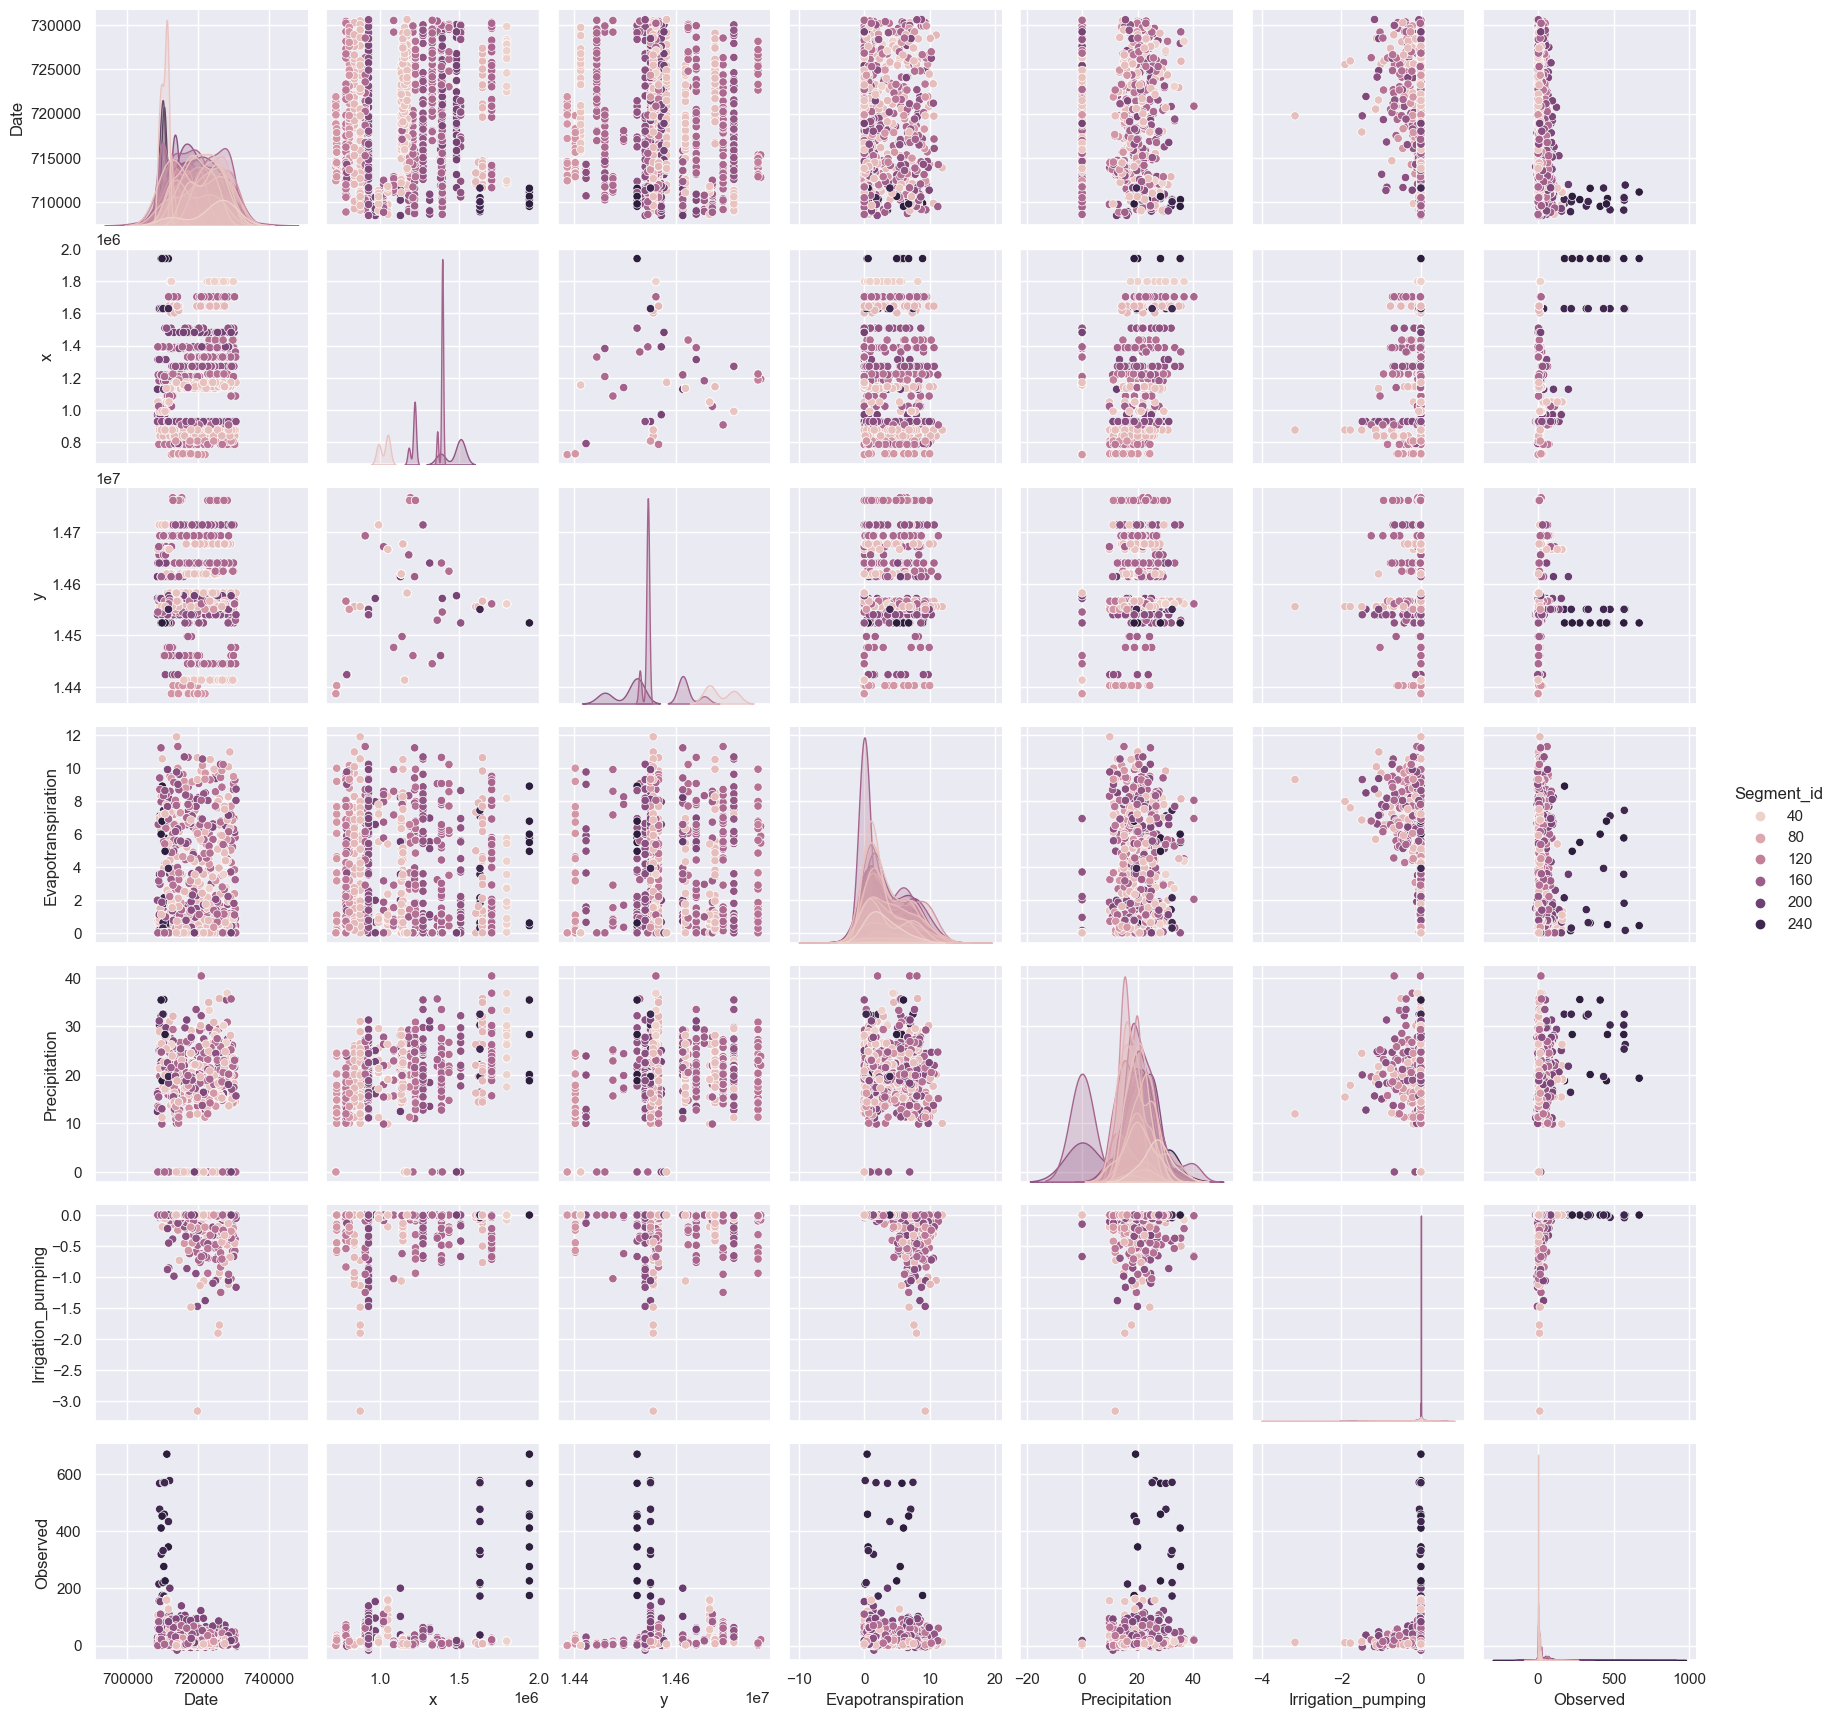

In [18]:
# need to change parameters, maybe take smaller sample to effectively show data
# X_numerical = hydro.drop(columns=["Observed", "Segment_id"])
sns.pairplot(hydro.sample(1000), hue="Segment_id")

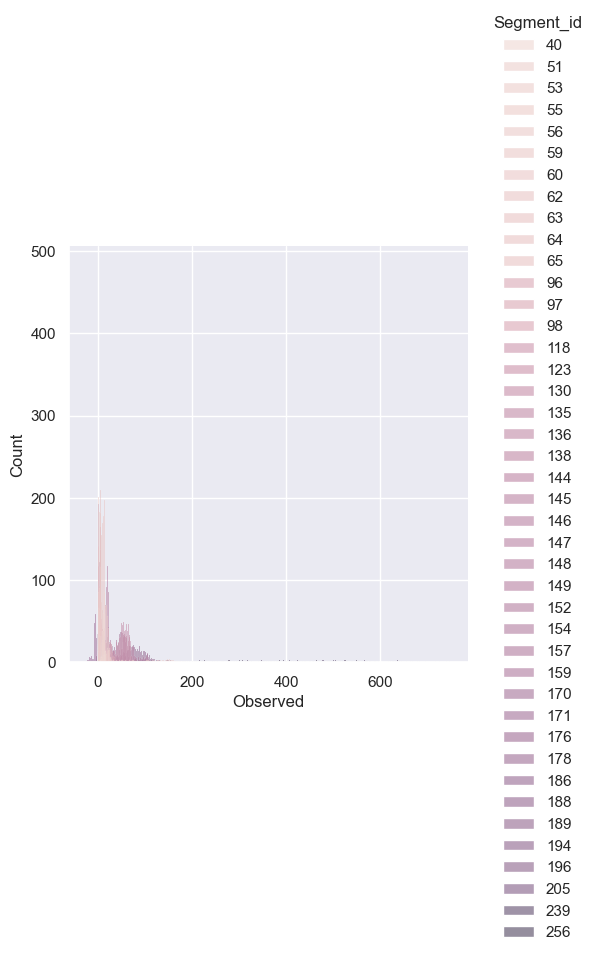

In [19]:
# distribution of observed
sns.displot(hydro, x="Observed", hue="Segment_id")

# Time Series Stuff
Here we will check if we need to add seasonality and lag features

In [23]:
hydro.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [27]:
# Convert date column to datetime
hydro['Date'] = hydro['Date'] - 693963
hydro['Date'] = pd.to_datetime(hydro['Date'], origin='1900-01-01', unit='D')
hydro.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,1945-11-30,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,1945-12-31,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,1946-01-28,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,1946-02-28,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,1946-03-30,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [29]:
# dummify categorical var
hydro = pd.get_dummies(hydro, columns=['Segment_id'], drop_first=True)
hydro.head()

,Date,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Segment_id_51,Segment_id_53,Segment_id_55,...,Segment_id_176,Segment_id_178,Segment_id_186,Segment_id_188,Segment_id_189,Segment_id_194,Segment_id_196,Segment_id_205,Segment_id_239,Segment_id_256
0,1945-11-30,1086190,14476800,0.59,18.99,0.0,0.145161,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1945-12-31,1086190,14476800,0.97,29.63,0.0,0.445161,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1946-01-28,1086190,14476800,1.34,29.63,0.0,1.332203,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1946-02-28,1086190,14476800,1.79,29.63,0.0,2.932203,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1946-03-30,1086190,14476800,8.23,29.63,0.0,3.728689,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


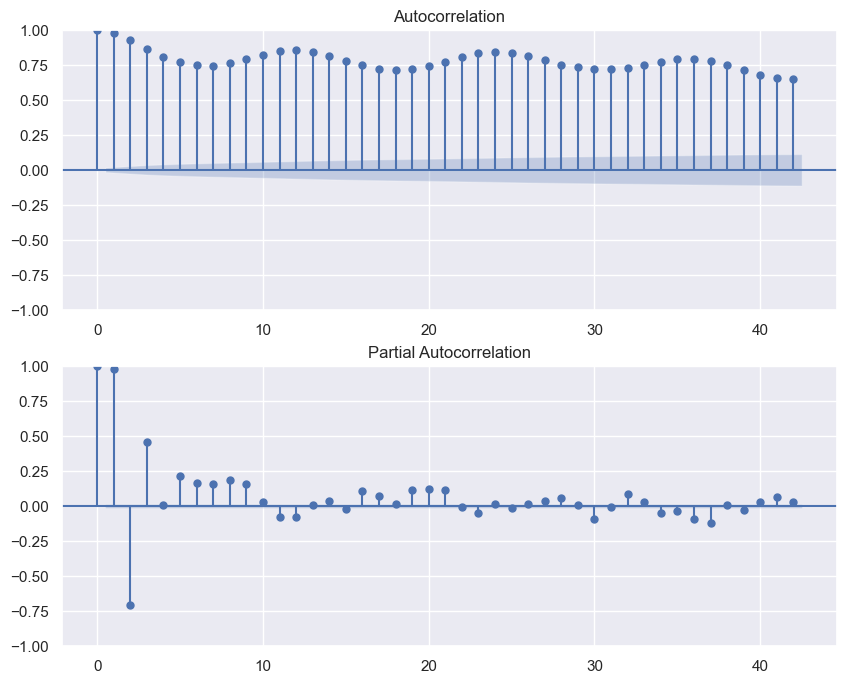

Durbin-Watson test statistic: 0.2476958283656761


In [33]:
# df = hydro
# Set date as the index
# df.set_index('Date', inplace=True)

# Check the autocorrelation of the target variable
# plot_acf(df['Observed'], lags=24)
# plt.show()

fig, axes = plt.subplots(2, 1, figsize=(10,8))
plot_acf(df['Observed'], ax=axes[0])
plot_pacf(df['Observed'], ax=axes[1])
plt.show()

# Fit the linear regression model without lag features
X = df.drop('Observed', axis=1)
y = df['Observed']
model = sm.OLS(y, sm.add_constant(X)).fit()

# Check for autocorrelation in the residuals using the Durbin-Watson test
dw = sm.stats.stattools.durbin_watson(model.resid)
print(f'Durbin-Watson test statistic: {dw}')

# if the Durbin-Watson test statistic is less than 2, it indicates positive autocorrelation in the residuals
# and suggests the need to include lag features in the model.


In [39]:
df.shift(3)

,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Segment_id_51,Segment_id_53,Segment_id_55,Segment_id_56,...,Segment_id_176,Segment_id_178,Segment_id_186,Segment_id_188,Segment_id_189,Segment_id_194,Segment_id_196,Segment_id_205,Segment_id_239,Segment_id_256
Date,,,,,,,,,,,,,,,,,,,,,
1945-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-02-28,1086190.0,14476800.0,0.59,18.99,0.0,0.145161,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1946-03-30,1086190.0,14476800.0,0.97,29.63,0.0,0.445161,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976-03-30,721870.0,14387040.0,0.00,0.00,0.0,0.255000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1976-04-30,721870.0,14387040.0,0.00,0.00,0.0,0.212903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1976-05-30,721870.0,14387040.0,0.00,0.00,0.0,0.253500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## TODO
* Look at Date variable (time series)
* Check if x & y pairs are unique to segment id
* Check assumptions

## Storytelling Notes
* Between 710000 and 715000 theres a random line of decrease in observed
* date is already turned into a numeric variable (good)
* need to create lag features 